In [1]:
import analysis
import elbow
import iteration
import pandas as pd
%matplotlib inline
import numpy as np

# Elbow plot

In [28]:
# Import data
data = pd.read_csv("data/clustering_synthetic_data.csv", header=None)

data.columns = ['x', 'y']
data.head()

,x,y
0,-0.265227,-0.121203
1,-0.164662,-0.095846
2,-0.328675,-0.530967
3,-0.501561,-0.281479
4,-0.099808,0.090795


In [30]:
# Normalize features
for column in data.columns:
    data[column] = analysis.normalization(data[column])

# Convert data into array
data_array = data.to_numpy()

Saved to plots/elbow_cluster_data.png


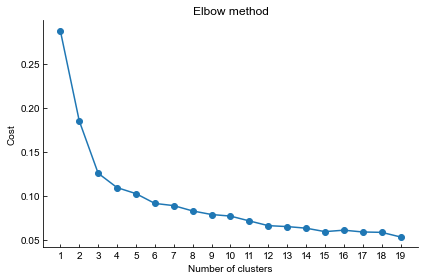

In [31]:
# Set the range of number of clusters
num_cluster = list(range(1, 20))

# Calculate cost function for each number of clusters
cost = []
for K in num_cluster:
    centroid_list = analysis.initialize(data, K)
    data_array = data.to_numpy()
    final_centroid, clusters = elbow.centroid_iteration(data_array, centroid_list, K)
    cost.append(elbow.cost_function(final_centroid, clusters, K))

# Plot elbow
elbow.plot_elbow(num_cluster, cost, 'cluster_data')

Elbow plot suggests that the appropriate number of clusters is 15.

# Implement k-means clustering for K = 5

In [39]:
K = 3

In [40]:
# Prepare the data again

# Import data
data = pd.read_csv("data/clustering_synthetic_data.csv", header=None)
data.columns = ['x', 'y']

# Normalize features
for column in data.columns:
    data[column] = analysis.normalization(data[column])

# Convert data into array
data_array = data.to_numpy()

# Randomly initialize K points
centroid_list = analysis.initialize(data, K)

Saved to plots/exploratory.png


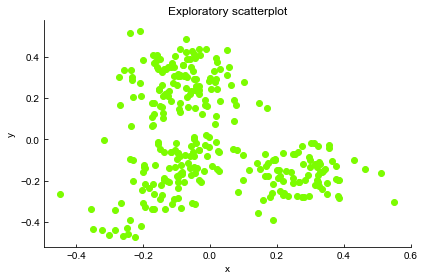

In [41]:
# Plot the initial data for exploration
analysis.plot_exploratory(data_array, 'x', 'y')

Saved to plots/initialization.png


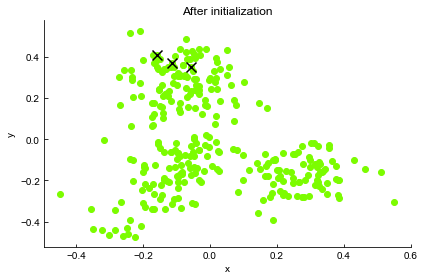

In [42]:
# Plot the data with initialization
analysis.plot_initialization(data_array, K, centroid_list, 'x', 'y')

Saved to plots/iteration1.png
Saved to plots/iteration2.png
Saved to plots/iteration3.png
Saved to plots/iteration4.png
Saved to plots/iteration5.png
Saved to plots/iteration6.png
Saved to plots/iteration7.png
Saved to plots/iteration8.png
Saved to plots/iteration9.png
Saved to plots/iteration10.png
Saved to plots/iteration11.png
Saved to plots/iteration12.png
Saved to plots/iteration13.png
Saved to plots/iteration14.png
Saved to plots/iteration15.png
Saved to plots/iteration16.png


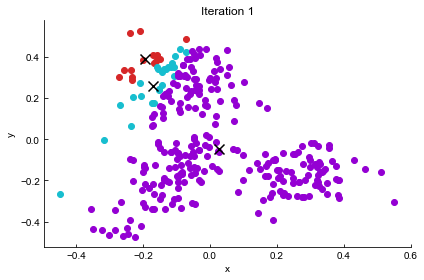

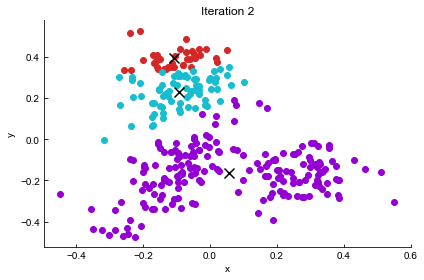

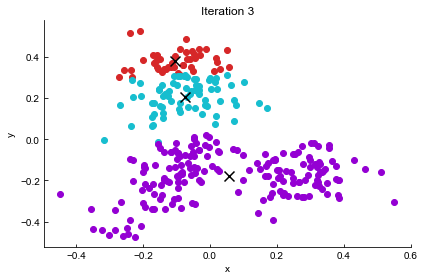

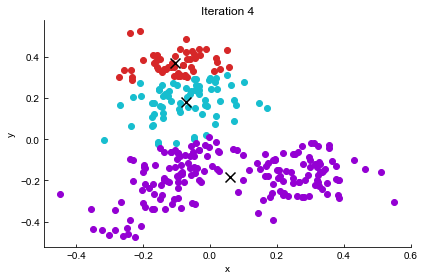

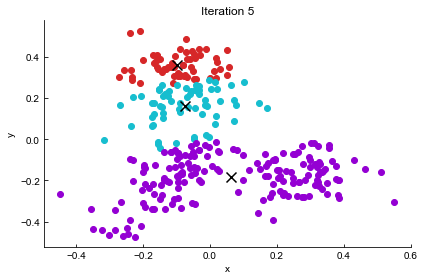

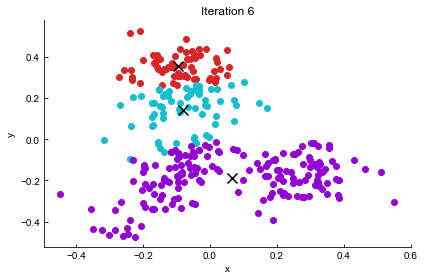

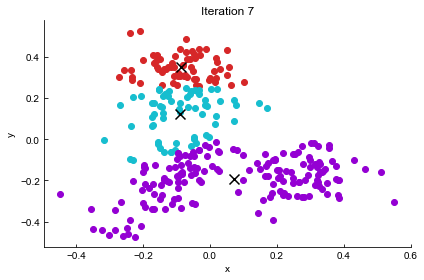

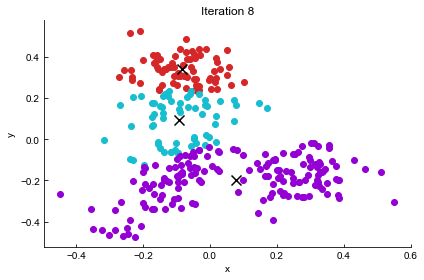

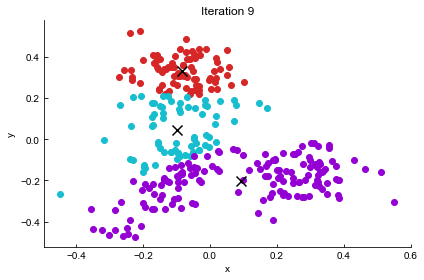

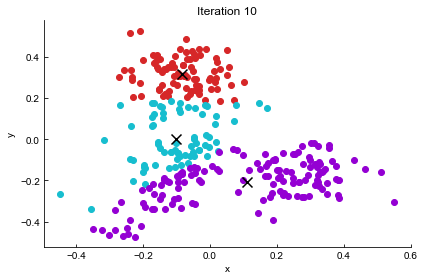

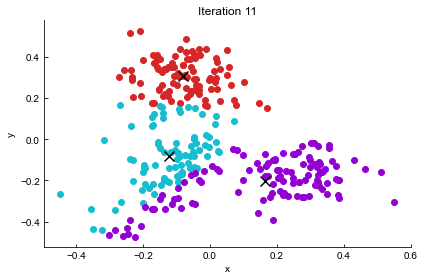

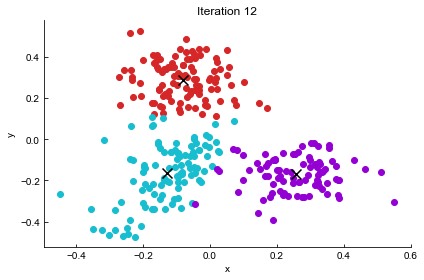

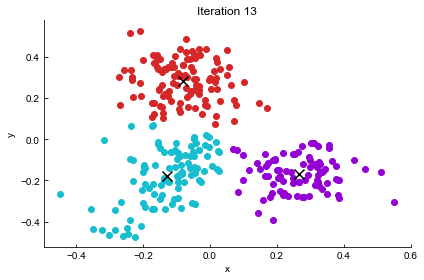

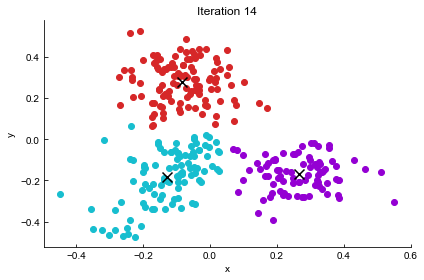

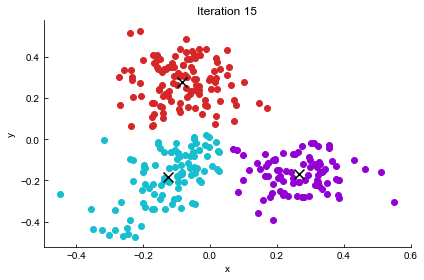

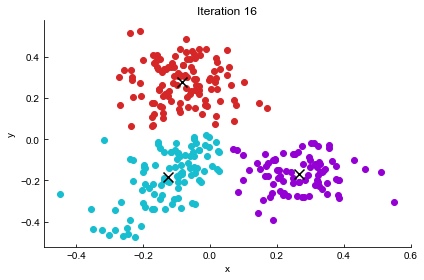

In [43]:
iteration = 0

while True:
    iteration += 1
    clusters = analysis.cluster_assignment(data_array, centroid_list, K)
    centroid_list = analysis.new_centroid(clusters, centroid_list)

    colors = [(214, 39, 40), (23, 190, 207), (148, 0, 211), (128, 128, 0), (165, 42, 42),
             (0, 39, 40), (0, 190, 207), (0, 0, 211), (0, 128, 0), (0, 42, 42),
             (214, 0, 40), (23, 0, 207), (148, 0, 0), (128, 0, 0), (165, 0, 42)]
    colors = [analysis.get_rgb(color) for color in colors]

    analysis.plot_iteration(iteration, clusters, centroid_list, K, colors, 'x', 'y')

    if np.allclose(centroid_list[-(K * 2) : -K], centroid_list[-K :]):
        break

Points are assigned to the clusters after 19iterations